<a href="https://colab.research.google.com/github/RajaAbitha/RajaAbitha/blob/main/Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the libraries
import pandas as pd
import numpy as np
import nltk

In [2]:
# Load the dataset
df = pd.read_csv('/content/tweets.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [6]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [7]:
# preprocessing
def clean_text(text):
    tokens = word_tokenize(text)

    tokens=[word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [8]:
df['clean_tweet'] = df['tweet'].apply(clean_text)

In [9]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test http android apps b...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally transparant silicon case thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,love would go talk makememories unplug relax i...
3,4,0,I'm wired I know I'm George I was made that wa...,wired know george made way iphone cute daventr...
4,5,1,What amazing service! Apple won't even talk to...,amazing service apple wo even talk question un...


In [10]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['clean_tweet'], df['label'], test_size=0.2, random_state=42)

In [11]:
# VEctorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
# RandomForest classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vec, y_train)

RandomForestClassifier()

In [13]:
# Predict the test
y_pred = rf_model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8781565656565656


In [14]:
# Sample test
new_tweet = "I love this product! It's amazing."
new_tweet_vec = vectorizer.transform([new_tweet])
prediction = rf_model.predict(new_tweet_vec)
print("Prediction:", prediction)

Prediction: [0]


              precision    recall  f1-score   support

    Negative       0.90      0.94      0.92      1152
    Positive       0.81      0.72      0.76       432

    accuracy                           0.88      1584
   macro avg       0.86      0.83      0.84      1584
weighted avg       0.88      0.88      0.88      1584



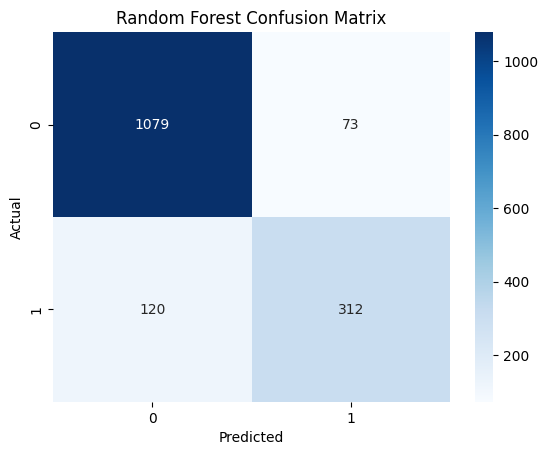

In [15]:
# Classification Report & Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')

plt.show()

Sample Test

In [16]:
sample_tweet = "I really hate the battery life of this phone"

In [17]:
cleaned_tweet = clean_text(sample_tweet)
print(cleaned_tweet)

really hate battery life phone


In [18]:
vectorized_tweet = vectorizer.transform([cleaned_tweet])

In [19]:
prediction = rf_model.predict(vectorized_tweet)[0]
print(prediction)

1


In [20]:
sentiment = "Positive" if prediction == 0 else "Negative"
print(f"Predicted Sentiment: {sentiment}")

Predicted Sentiment: Negative
